In [1]:
import numpy as np
import os
import torch
import matplotlib.pyplot as plt

In [2]:
with open('/home/jykang/NeMo/tokenizer/ctc/vocab.txt') as f:
    ctc_token = f.readlines()

def ctc_alignment_check_(token):
    label =''
    for i, t in enumerate(token):
        if t != 128:
            new_token = ctc_token[t-1].replace('\n', '').replace('#', '')
            new_token = new_token+(7-len(new_token))*' '
            label += new_token
        else:
            label += '_      '
    print(label)

def show_uncertainty(un):
    output = ''
    for i, t in enumerate(un):
        output = output + "{:.4f}".format(t.item()) + ' '
    print(output)

def show_timestep(un):
    output = ''
    for i, t in enumerate(un):
        output = output + "{:.0f}".format(t.item()) + ' '*(7-(len(str(t.item()))))
    print(output)

In [15]:
def plot(u, probs_evid, probs_sft):
    print(u.shape, probs_evid.shape, probs_sft.shape)
    # u = u[:100]
    # probs_evid = probs_evid[:100]
    # probs_sft = probs_sft[:100]
    # x축 정의 (time step)
    x = torch.arange(1, len(u) + 1)

    # 그래프 그리기
    plt.figure(figsize=(12, 6))
    # plt.plot(x.cpu().numpy(), u, marker='o', linestyle='-', color='b')
    plt.plot(x.cpu().numpy(), probs_evid, marker='x', linestyle='-', color='g')
    plt.plot(x.cpu().numpy(), probs_sft, marker='x', linestyle='-', color='r')

    # x축 틱 마커 설정
    plt.xticks(torch.arange(0, len(u) + 1, 15).cpu().numpy())

    # 축 레이블 설정
    plt.xlabel('Time Step')
    plt.ylabel('Values')

    plt.ylim(0.0, 1.01)

    # 그래프 표시
    plt.grid(True)
    plt.show()

In [4]:
save_path = '/home/jykang/NeMo/nemo_experiments/zeroth_korean/'
items = os.listdir(save_path)
len(items)

9

0      1      2      3      4      5      6      7      8      9      10     11     12     13     14     15     16     17     18     19     20     21     22     23     24     25     26     27     28     29     30     31     32     33     34     35     36     37     38     39     40     41     42     43     44     45     46     47     48     49     50     51     52     53     54     55     56     57     58     59     60     61     62     63     64     65     66     67     68     69     70     71     72     73     74     75     76     77     78     79     80     81     82     83     84     85     86     87     88     89     90     91     92     93     94     95     96     97     98     99     100    101    102    103    104    105    106    107    108    109    110    111    112    113    114    115    116    117    118    119    120    121    122    123    124    125    126    127    128    129    130    131    132    133    134    135    136    137    138    139    140    141    142   

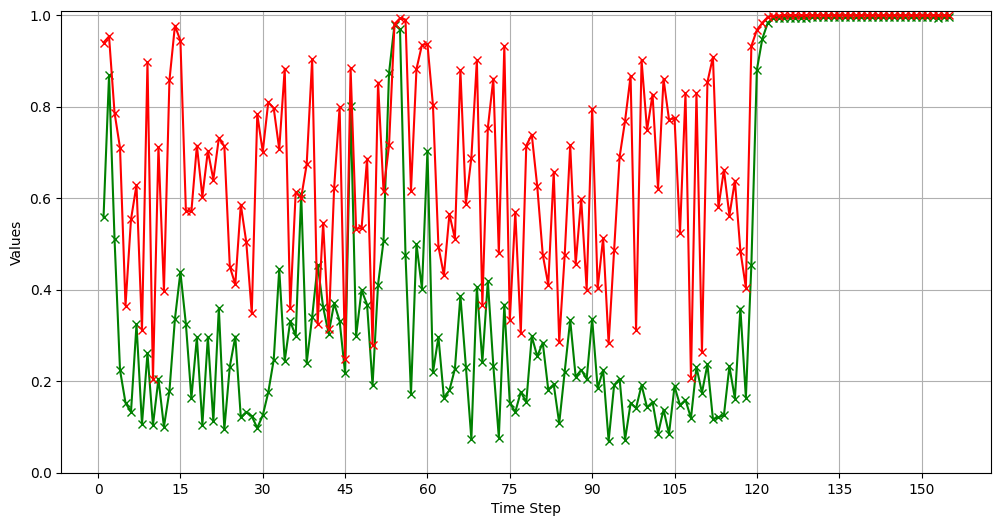

0      1      2      3      4      5      6      7      8      9      10     11     12     13     14     15     16     17     18     19     20     21     22     23     24     25     26     27     28     29     30     31     32     33     34     35     36     37     38     39     40     41     42     43     44     45     46     47     48     49     50     51     52     53     54     55     56     57     58     59     60     61     62     63     64     65     66     67     68     69     70     71     72     73     74     75     76     77     78     79     80     81     82     83     84     85     86     87     88     89     90     91     92     93     94     95     96     97     98     99     100    101    
_      _      d      _      _      le     _      _      _      an     _      t      _      _      _      _      be     _      _      c      a      _      us     _      _      _      _      w      _      _      _      _      _      _      _      _      _      _      _      _      _    

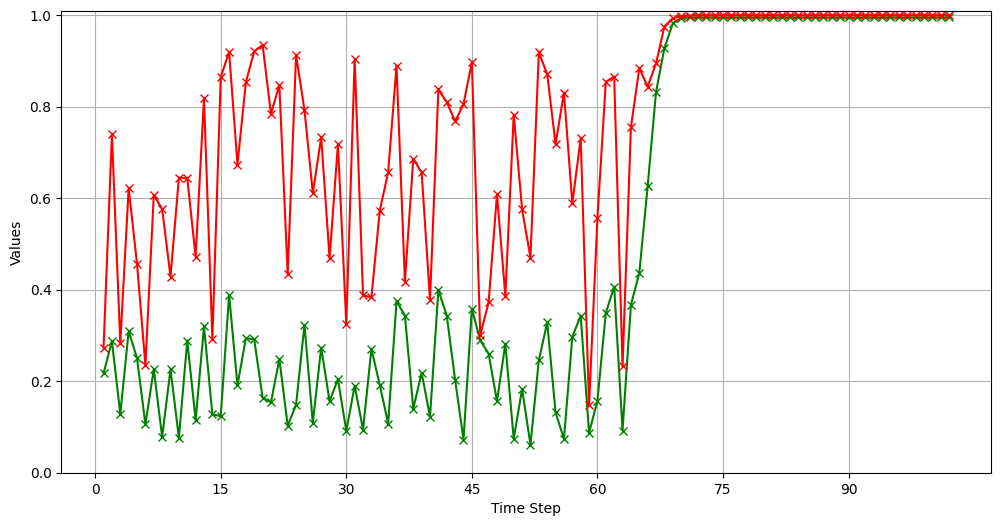

0      1      2      3      4      5      6      7      8      9      10     11     12     13     14     15     16     17     18     19     20     21     22     23     24     25     26     27     28     29     30     31     32     33     34     35     36     37     38     39     40     41     42     43     44     45     46     47     48     49     50     51     52     53     54     55     56     57     58     59     60     61     62     63     64     65     66     67     68     69     70     71     72     73     74     75     76     77     78     79     80     81     82     83     84     85     86     87     88     89     90     91     92     93     94     95     96     97     98     99     100    101    102    103    104    105    106    107    108    109    110    111    112    113    114    115    116    117    118    119    120    121    122    123    124    125    126    127    128    129    130    131    132    133    134    135    136    137    138    139    140    141    
i    

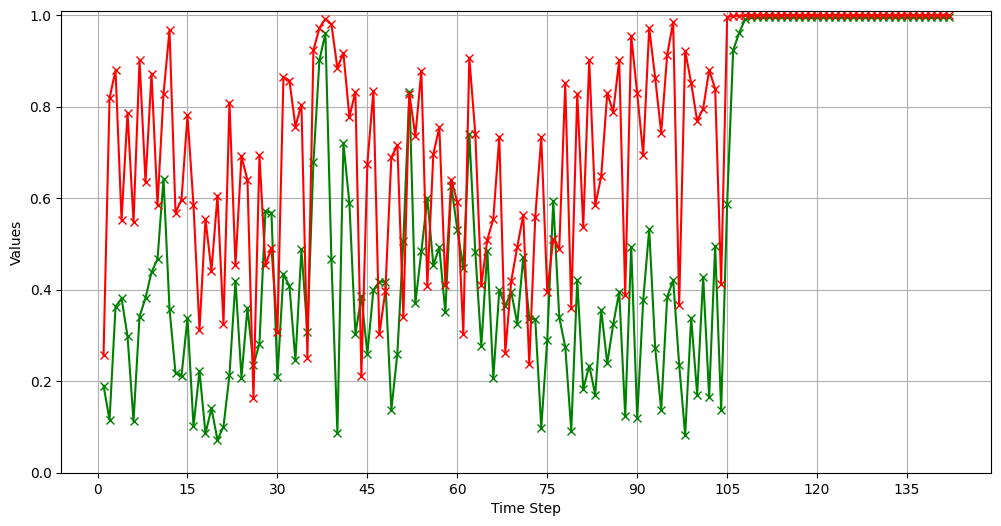

0      1      2      3      4      5      6      7      8      9      10     11     12     13     14     15     16     17     18     19     20     21     22     23     24     25     26     27     28     29     30     31     32     33     34     35     36     37     38     39     40     41     42     43     44     45     46     47     48     49     50     51     52     53     54     55     56     57     58     59     60     61     62     63     64     65     66     67     68     69     70     71     72     73     74     75     76     77     78     79     80     81     82     83     84     85     86     87     88     89     90     91     92     93     94     95     96     97     98     99     100    101    102    103    104    105    106    107    108    109    110    111    112    113    114    115    116    117    118    119    120    121    122    123    124    125    126    127    128    129    130    131    132    133    134    135    136    137    138    139    140    141    142   

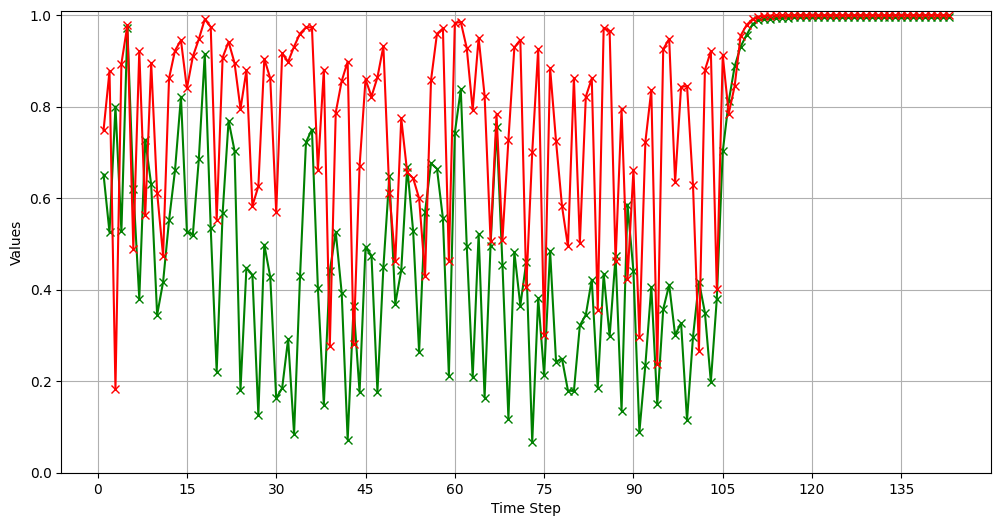

0      1      2      3      4      5      6      7      8      9      10     11     12     13     14     15     16     17     18     19     20     21     22     23     24     25     26     27     28     29     30     31     32     33     34     35     36     37     38     39     40     41     42     43     44     45     46     47     48     49     50     51     52     53     54     55     56     57     58     59     60     61     62     63     64     65     66     67     68     69     70     71     72     73     74     75     76     77     78     79     80     81     82     83     84     85     86     87     88     89     90     91     92     93     94     95     96     97     98     99     100    101    102    103    104    105    106    107    108    109    110    111    112    113    114    115    116    117    118    119    120    121    122    123    124    125    126    127    128    129    130    131    132    133    134    135    136    137    138    139    140    141    142   

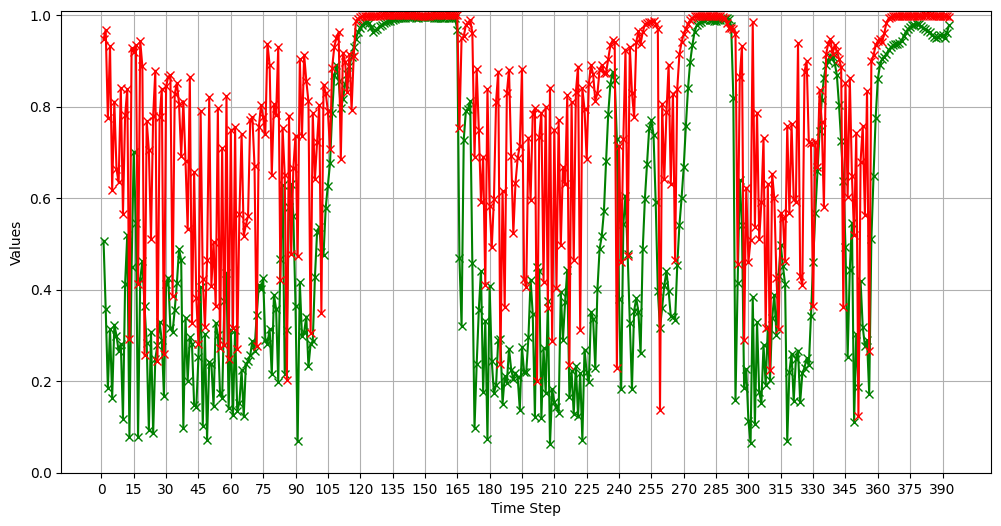

0      1      2      3      4      5      6      7      8      9      10     11     12     13     14     15     16     17     18     19     20     21     22     23     24     25     26     27     28     29     30     31     32     33     34     35     36     37     38     39     40     41     42     43     44     45     46     47     48     49     50     51     52     53     54     55     56     57     58     59     60     61     62     63     64     65     66     67     68     69     70     71     72     73     74     75     76     77     78     79     80     81     82     83     84     85     86     87     88     89     90     91     92     93     94     
_      _      _      _      _      _      _      _      _      _      _      _      to     _      _      _      _      m      _      _      _      _      c      _      _      _      _      _      us     _      _      a      _      _      _      _      _      _      _      _      _      _      _      s      _      _      i      _    

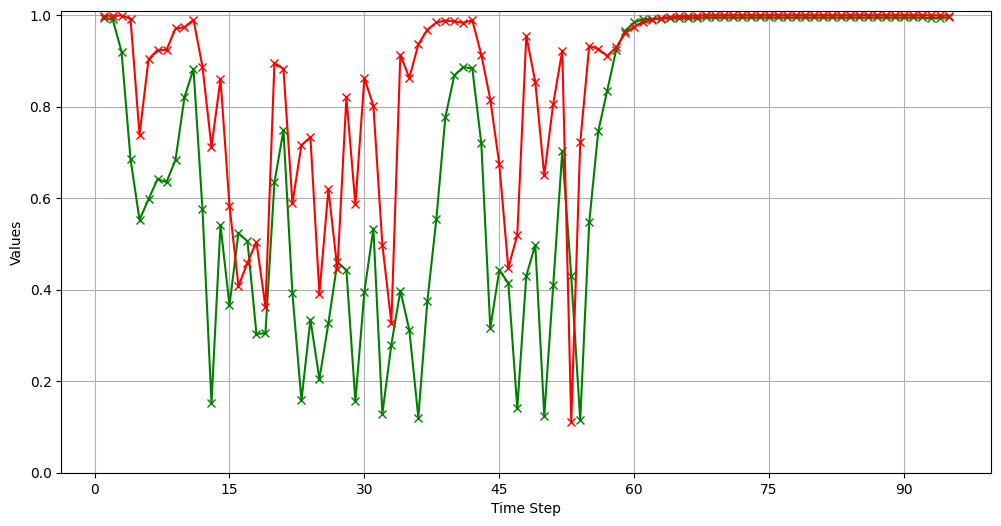

0      1      2      3      4      5      6      7      8      9      10     11     12     13     14     15     16     17     18     19     20     21     22     23     24     25     26     27     28     29     30     31     32     33     34     35     36     37     38     39     40     41     42     43     44     45     46     47     48     49     50     51     52     53     54     55     56     57     58     59     60     61     62     63     64     65     66     67     68     69     70     71     72     73     74     75     76     77     78     79     80     81     82     83     84     
_      _      _      _      _      _      e      _      _      _      _      _      _      _      _      _      _      not    _      _      _      _      to     _      _      _      do     _      _      _      _      _      re     _      _      _      _      on     _      _      _      _      the    _      _      m      _      _      _      _      _      _      _      _      _      _      _      _    

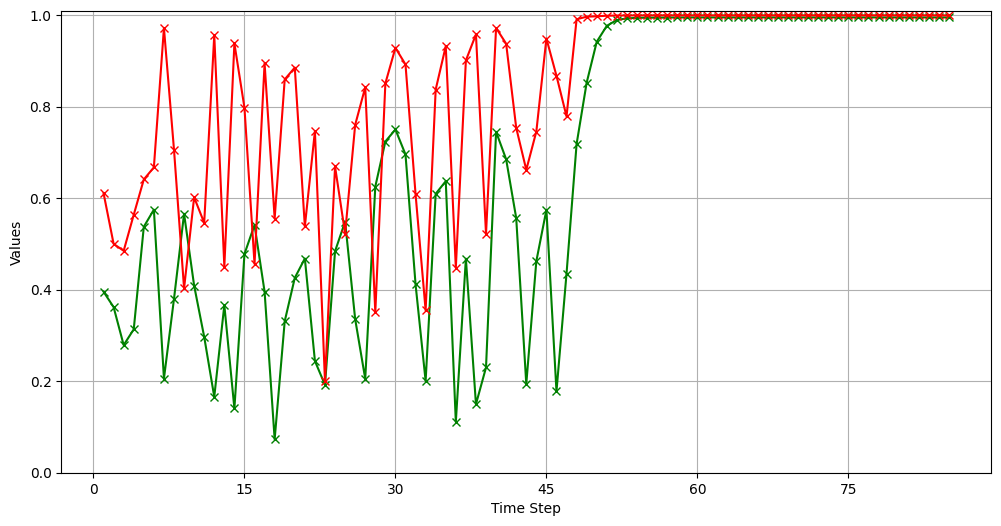

0      1      2      3      4      5      6      7      8      9      10     11     12     13     14     15     16     17     18     19     20     21     22     23     24     25     26     27     28     29     30     31     32     33     34     35     36     37     38     39     40     41     42     43     44     45     46     47     48     49     50     51     52     53     54     55     56     57     58     59     60     61     62     63     64     65     66     67     68     69     70     71     72     73     74     75     76     77     78     79     80     81     82     83     84     85     86     87     88     89     90     91     92     93     94     95     96     97     98     99     100    101    102    103    104    105    106    107    108    109    110    111    112    113    114    115    116    117    118    119    120    121    122    123    124    125    126    127    128    129    130    131    132    
on     _      _      p      _      _      _      _      _      _    

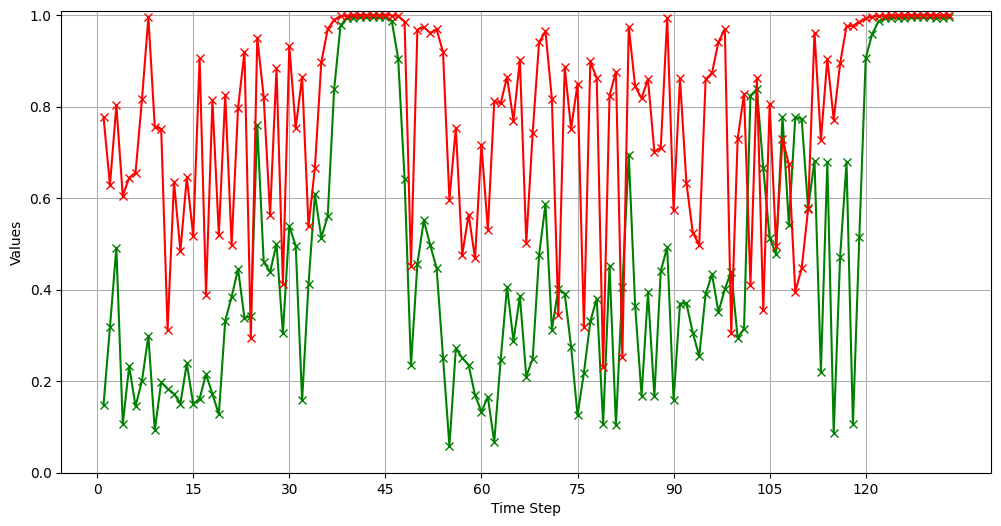

0      1      2      3      4      5      6      7      8      9      10     11     12     13     14     15     16     17     18     19     20     21     22     23     24     25     26     27     28     29     30     31     32     33     34     35     36     37     38     39     40     41     42     43     44     45     46     47     48     49     50     51     52     53     54     55     56     57     58     59     60     61     62     63     64     65     66     67     68     69     70     71     72     73     74     75     76     77     78     79     80     81     82     83     84     85     86     87     88     89     90     91     92     93     94     95     96     97     98     99     100    101    102    103    104    105    106    107    108    109    110    111    112    113    
_      _      _      _      _      ▁      _      or     _      _      d      _      _      ing    _      _      you    _      g      o      _      o      d      _      l      l      d      an     _    

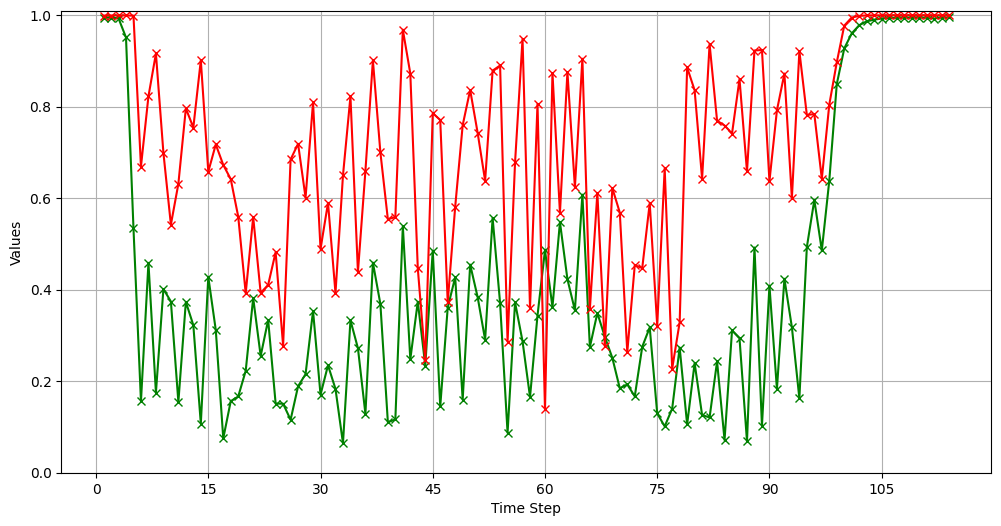

In [23]:
for i in range(len(items)):
    path = save_path + str(i + 1)\

    # y = np.load(path + '/y.npy')
    greedy_evid = np.load(path + '/greedy_evid.npy')
    probs_evid = np.load(path + '/probs_evid.npy')
    u = np.load(path + '/u.npy')
    text_evid = np.load(path + '/text_evid.npy')

    probs_sft = np.load(path + '/probs_sft.npy')

    greedy_evid = greedy_evid[119:]
    probs_evid = probs_evid[119:]
    u = u[119:]
    probs_sft = probs_sft[119:]

    time = torch.arange(u.shape[0])

    show_timestep(time)
    # ctc_alignment_check_(y)
    ctc_alignment_check_(greedy_evid)
    show_uncertainty(u)
    show_uncertainty(probs_evid)
    print(text_evid)

    plot(u, probs_evid, probs_sft)